In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, accuracy_score,f1_score,recall_score, make_scorer, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score


sns.set_style('whitegrid')
sns.set_palette('Greys')

In [2]:
data = pd.read_csv('EMSE_DatosAbiertos.csv')
data.head()

,sitio,record,q1,texto_q1,q2,texto_q2,q3,texto_q3,q4,q5,...,texto_qnpa5g,qnpa7g,texto_qnpa7g,qnpe3g,texto_qnpe3g,qnpe5g,texto_qnpe5g,weight,stratum,psu
0,AG,1,3.0,13 años,2.0,Femenino,2.0,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,...,Si,1.0,Si,2.0,No,2.0,No,457.09,201801010,19
1,AG,2,3.0,13 años,2.0,Femenino,2.0,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,...,Si,2.0,No,2.0,No,2.0,No,457.09,201801010,19
2,AG,3,4.0,14 años,1.0,Masculino,4.0,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,...,Si,2.0,No,2.0,No,2.0,No,261.44,201801010,19
3,AG,4,6.0,16 años,1.0,Masculino,2.0,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,...,No,2.0,No,1.0,Si,1.0,Si,550.90,201801010,19
4,AG,5,3.0,13 años,2.0,Femenino,2.0,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,...,No,2.0,No,2.0,No,2.0,No,457.09,201801010,19


In [3]:
#Eliminamos las columnas calculadas
columns_to_drop = data.columns[144:306]
data = data.drop(columns_to_drop, axis=1)
#Eliminamos las columnas 'sitio' y 'record'
data = data.iloc[:,2:]

In [4]:
#Modificamos los nombres de las variables objetivo
data.rename(columns={
    'q24':'pensamiento_suicida',
    'q25':'ideacion_suicida',
    'q26':'intento_suicida'
}, inplace=True)

In [5]:
 #Reorganizamos las columnas
cols = data.columns.tolist()

objet_cols = [
              'pensamiento_suicida',
              'ideacion_suicida',
              'intento_suicida',
]

cols = objet_cols + [col for col in cols if col not in objet_cols]

data = data[cols]

In [6]:
#Modificamos las variables a lógicas
print(data.iloc[:,:3].describe())

       pensamiento_suicida  ideacion_suicida  intento_suicida
count         55628.000000      56217.000000     56302.000000
mean              1.784964          1.826850         1.247398
std               0.410851          0.378381         0.689435
min               1.000000          1.000000         1.000000
25%               2.000000          2.000000         1.000000
50%               2.000000          2.000000         1.000000
75%               2.000000          2.000000         1.000000
max               2.000000          2.000000         5.000000


In [7]:
data.iloc[:,:2] = data.iloc[:,:2].replace({
    1:1,
    2:0
})

data.iloc[:,2] = data.iloc[:,2].replace({
    1:0,
    2:1,
    3:1,
    4:1,
    5:1
})

print(data.iloc[:,:3].describe())

       pensamiento_suicida  ideacion_suicida  intento_suicida
count         55628.000000      56217.000000     56302.000000
mean              0.215036          0.173150         0.151096
std               0.410851          0.378381         0.358145
min               0.000000          0.000000         0.000000
25%               0.000000          0.000000         0.000000
50%               0.000000          0.000000         0.000000
75%               0.000000          0.000000         0.000000
max               1.000000          1.000000         1.000000


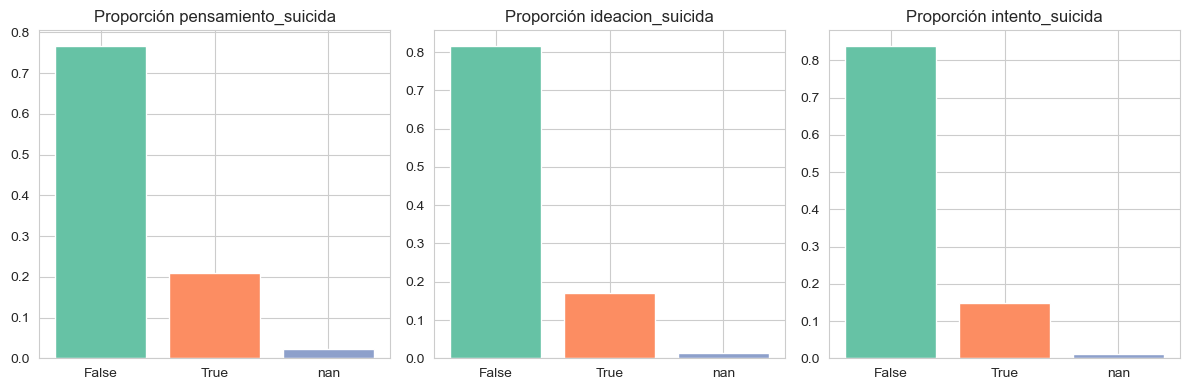


Proporción pensamiento_suicida              
0.0    76.63
1.0    20.99
NaN     2.37
Name: pensamiento_suicida, dtype: float64

Proporción ideacion_suicida              
0.0    81.58
1.0    17.08
NaN     1.34
Name: ideacion_suicida, dtype: float64

Proporción intento_suicida              
0.0    83.88
1.0    14.93
NaN     1.19
Name: intento_suicida, dtype: float64


In [8]:
#Visualización de las variables objetivo

def plot_variable_proportions(data, variables):
    fig, axes = plt.subplots(1, len(variables), figsize=(12, 4))
    
    for i, variable in enumerate(variables):
        prop_variable = data[variable].value_counts(normalize=True, dropna=False)
        prop_variable = prop_variable.rename({0: 'False', 1: 'True'})
        
        labels = prop_variable.index.astype(str)
        values = prop_variable.values
        
        axes[i].bar(labels, values, color=sns.color_palette('Set2'))
        axes[i].set_title(f'Proporción {variable}')
    
    plt.tight_layout()
    plt.show()
def variable_proportions(data, variables):
    for i, variable in enumerate(variables):
        print(f'\nProporción {variable}\
              \n{np.round(data[variable].value_counts(normalize=True, dropna=False)*100,2)}')

plot_variable_proportions(data, ['pensamiento_suicida', 'ideacion_suicida', 'intento_suicida'])
variable_proportions(data, ['pensamiento_suicida', 'ideacion_suicida', 'intento_suicida'])

* **Pensamiento suicida**: Aproximadamente el 21% de los individuos en el dataset han experimentado pensamientos suicidas.


* **Ideación suicida**: Cerca del 17.08% de los individuos reportan haber tenido ideación suicida.


* **Intento suicida**: Alrededor del 14.93% de los individuos han realizado intentos de suicidio.

In [9]:
#Creación columna sin_pensamiento_suicida
data['sin_pensamiento_suicida'] = data['pensamiento_suicida'] + data['ideacion_suicida'] + data['intento_suicida'] == 0

In [10]:
# Manipulación y selección de variables explicativas

In [11]:
#Edad (texto_q1)
replace_age = {'11 años o menos': 11, '12 años': 12, '13 años': 13, '14 años': 14,
             '15 años': 15, '16 años': 16, '17 años': 17, '18 años o más': 18}               
data['age'] = data['texto_q1'].replace(replace_age)
data['age'] = data['age'].fillna(data['age'].median())
data['age'] = data['age'].astype(int)
print(data['age'].describe())

count    56981.000000
mean        14.905583
std          1.356834
min         11.000000
25%         14.000000
50%         15.000000
75%         16.000000
max         18.000000
Name: age, dtype: float64


In [12]:
#Funciones útlies

def replaceProp1(data, col, col_rep, nanvalue):
    """Funcion que reemplaza los valores nulos según el peso de la proporción de los demás valores
    cuando el valor nulo tiene un nombre diferente a NaN"""
    data[col_rep] = data[col].replace(nanvalue, np.nan)
    prop = data[col_rep].value_counts(normalize=True)
    cat = prop.index.tolist()
    weight = prop.tolist()
    missing_data = data[col_rep].isnull().sum()
    random_samples = random.choices(cat, weights=weight, k=missing_data)
    data.loc[data[col_rep].isnull(), col_rep] = random_samples
    
def replaceProp2(data, col, col_rep):
    """Funcion que reemplaza los valores nulos según el peso de la proporción de los demás valores"""
    data[col_rep] = data[col]
    prop = data[col_rep].value_counts(normalize=True)
    cat = prop.index.tolist()
    weight = prop.tolist()
    missing_data = data[col_rep].isnull().sum()
    random_samples = random.choices(cat, weights=weight, k=missing_data)
    data.loc[data[col_rep].isnull(), col_rep] = random_samples



In [13]:
#Sexo (texto_q2)
print(f'Before replacement\n{data["texto_q2"].value_counts(normalize=True, dropna=False)}\n')

replaceProp1(data, 'texto_q2', 'sex', 'Dato perdido')

print(f'\nAfter replacement\n{data["sex"].value_counts(normalize=True, dropna=False)}')

Before replacement
Femenino        0.515295
Masculino       0.475299
Dato perdido    0.009407
Name: texto_q2, dtype: float64


After replacement
Femenino     0.520138
Masculino    0.479862
Name: sex, dtype: float64


In [14]:
#close_friends (q27)
replace_friends = {1:0,2:1,3:2,4:3}

data['q27'] = data['q27'].replace(replace_friends)

print(f'Before replacement\n{data["q27"].value_counts(normalize=True, dropna=False)}\n')

replaceProp2(data, 'q27', 'close_friends')

data['close_friends'] = data['close_friends'].astype(int)

print(f'\nAfter replacement\n{data["close_friends"].value_counts(normalize=True, dropna=False)}')


Before replacement
3.0    0.679718
2.0    0.159895
1.0    0.083045
0.0    0.058458
NaN    0.018883
Name: q27, dtype: float64


After replacement
3    0.692599
2    0.162967
1    0.084783
0    0.059651
Name: close_friends, dtype: float64


#### q28

* 1	- Nunca probé cigarrillos
* 2	- 7 años de edad o menos
* 3	- 8 o 9 años
* 4	- 10 u 11 años
* 5	- 12 o 13 años
* 6	- 14 o 15 años
* 7	- 16 o 17 años
* 8	- 18 años o más

#### first_cigarette
* 1	- No experimentado
* 2	- Infancia
* 3	- Adolescencia
* 4	- 18+


In [15]:
first_cons_rep_num={
    1:1,
    2:2,
    3:2,
    4:2,
    5:2,
    6:3,
    7:3,
    8:4,
}

map_first_cons={
    1:'No experimentado',
    2:'Infancia',
    3:'Adolescencia',
    4:'18+'
}

data['q_first_cigarette'] = data['q28'].replace(first_cons_rep_num)

In [16]:
print(f'Before replacement\n{data["q_first_cigarette"].value_counts(normalize=True, dropna=False,).sort_index()}\n')

replaceProp2(data, 'q_first_cigarette', 'q_first_cigarette')

data['q_first_cigarette'] = data['q_first_cigarette'].astype(int)

print(f'\nAfter replacement\n{data["q_first_cigarette"].value_counts(normalize=True, dropna=False,).sort_index()}')

Before replacement
1.0    0.584616
2.0    0.239852
3.0    0.154753
4.0    0.000298
NaN    0.020481
Name: q_first_cigarette, dtype: float64


After replacement
1    0.596497
2    0.245327
3    0.157860
4    0.000316
Name: q_first_cigarette, dtype: float64


In [17]:
data['t_first_cigarette'] = data['q_first_cigarette'].map(map_first_cons)

#### q29
* 1 - 0 días
* 2 - 1 o 2 días
* 3 - 3 a 5 días
* 4 - 6 a 9 días
* 5 - 10 a 19 días
* 6 - 20 a 29 días
* 7 - Los 30 días

#### freq_cigarette
* 1 - Sin consumo
* 2 - Consumo ocasional
* 3 - Consumo moderado
* 4 - Consumo problemático


In [18]:
freq_cons_rep_num={
    2:2,
    3:2,
    4:3,
    5:3,
    6:4,
    7:4,
}

freq_drugs_map={
    1:'Sin consumo',
    2:'Consumo ocasional',
    3:'Consumo moderado',
    4:'Consumo problemático',
}

data['q_freq_cigarette'] = data['q29'].replace(freq_cons_rep_num)

In [19]:
print(f'Before replacement\n{data["q_freq_cigarette"].value_counts(normalize=True, dropna=False,).sort_index()}\n')

replaceProp2(data, 'q_freq_cigarette', 'q_freq_cigarette')

data['q_freq_cigarette'] = data['q_freq_cigarette'].astype(int)

print(f'\nAfter replacement\n{data["q_freq_cigarette"].value_counts(normalize=True, dropna=False,).sort_index()}')

Before replacement
1.0    0.792089
2.0    0.113617
3.0    0.043488
4.0    0.038978
NaN    0.011829
Name: q_freq_cigarette, dtype: float64


After replacement
1    0.801355
2    0.114968
3    0.044173
4    0.039504
Name: q_freq_cigarette, dtype: float64


In [20]:
data['t_freq_cigarette'] = data['q_freq_cigarette'].map(freq_drugs_map)

#### q34
* 1-Nunca tomé alcohol más que unos pocos sorbos
* 2-7 años o menos
* 3-8 o 9 años
* 4-10 o 11 años
* 5-12 o 13 años
* 6-14 o 15 años
* 7-16 o 17 años
* 8-18 años o más

#### first_alcohol
* 1	- No experimentado
* 2	- Infancia
* 3	- Adolescencia
* 4	- 18+

In [21]:
data['q_first_alcohol'] = data['q34'].replace(first_cons_rep_num)

In [22]:
print(f'Before replacement\n{data["q_first_alcohol"].value_counts(normalize=True, dropna=False,).sort_index()}\n')

replaceProp2(data, 'q_first_alcohol', 'q_first_alcohol')

data['q_first_alcohol'] = data['q_first_alcohol'].astype(int)

print(f'\nAfter replacement\n{data["q_first_alcohol"].value_counts(normalize=True, dropna=False,).sort_index()}')

Before replacement
1.0    0.221161
2.0    0.448974
3.0    0.265650
4.0    0.000281
NaN    0.063934
Name: q_first_alcohol, dtype: float64


After replacement
1    0.236693
2    0.479634
3    0.283393
4    0.000281
Name: q_first_alcohol, dtype: float64


In [23]:
data['t_first_alcohol'] = data['q_first_alcohol'].map(map_first_cons)

#### q35
* 1- 0 días
* 2- 1 o 2 días
* 3- 3 a 5 días
* 4- 6 a 9 días
* 5- 10 a 19 días
* 6- 20 a 29 días
* 7- Los 30 días

#### freq_alcohol
* 1 - Sin consumo
* 2 - Consumo ocasional
* 3 - Consumo moderado
* 4 - Consumo problemático

In [24]:
data['q_freq_alcohol'] = data['q35'].replace(freq_cons_rep_num)

In [25]:
print(f'Before replacement\n{data["q_freq_alcohol"].value_counts(normalize=True, dropna=False,).sort_index()}\n')

replaceProp2(data, 'q_freq_alcohol', 'q_freq_alcohol')

data['q_freq_alcohol'] = data['q_freq_alcohol'].astype(int)

print(f'\nAfter replacement\n{data["q_freq_alcohol"].value_counts(normalize=True, dropna=False,).sort_index()}')

Before replacement
1.0    0.436286
2.0    0.366420
3.0    0.128481
4.0    0.031203
NaN    0.037609
Name: q_freq_alcohol, dtype: float64


After replacement
1    0.453379
2    0.381180
3    0.133115
4    0.032327
Name: q_freq_alcohol, dtype: float64


In [26]:
data['t_freq_alcohol'] = data['q_freq_alcohol'].replace(freq_drugs_map)

#### q40
* 1-	Nunca usé Drogas
* 2-	7 años o menos
* 3-	8 o 9 años
* 4-	10 o 11 años
* 5-	12 o 13 años
* 6-	14 o 15 años
* 7-	16 o 17 años
* 8-	18 años o más

#### first_drugs
* 1	- No experimentado
* 2	- Infancia
* 3	- Adolescencia
* 4	- 18+


In [27]:
data['q_first_drugs'] = data['q40'].replace(first_cons_rep_num)

In [28]:
print(f'Before replacement\n{data["q_first_drugs"].value_counts(normalize=True, dropna=False,).sort_index()}\n')

replaceProp2(data, 'q_first_drugs', 'q_first_drugs')

data['q_first_drugs'] = data['q_first_drugs'].astype(int)

print(f'\nAfter replacement\n{data["q_first_drugs"].value_counts(normalize=True, dropna=False,).sort_index()}')

Before replacement
1.0    0.806901
2.0    0.055352
3.0    0.089258
4.0    0.000123
NaN    0.048367
Name: q_first_drugs, dtype: float64


After replacement
1    0.848248
2    0.058318
3    0.093312
4    0.000123
Name: q_first_drugs, dtype: float64


In [29]:
data['t_first_drugs'] = data['q_first_drugs'].replace(map_first_cons)

####  q42
* 1-	0 veces
* 2-	1 o 2 veces
* 3-	3 a 9 veces
* 4-	10 a 19 veces
* 5-	20 veces o más

#### freq_marihuana

* 1 - Sin consumo
* 2 - Consumo ocasional
* 3 - Consumo moderado
* 4 - Consumo problemático


In [30]:
freq_drugs_rep_num={
    1:1,
    2:2,
    3:3,
    4:3,
    5:4,
}

data['q_freq_marihuana'] = data['q42'].replace(freq_drugs_rep_num)

In [31]:
print(f'Before replacement\n{data["q_freq_marihuana"].value_counts(normalize=True, dropna=False,).sort_index()}\n')

replaceProp2(data, 'q_freq_marihuana', 'q_freq_marihuana')

data['q_freq_marihuana'] = data['q_freq_marihuana'].astype(int)

print(f'\nAfter replacement\n{data["q_freq_marihuana"].value_counts(normalize=True, dropna=False,).sort_index()}')

Before replacement
1.0    0.884839
2.0    0.040750
3.0    0.034450
4.0    0.013829
NaN    0.026132
Name: q_freq_marihuana, dtype: float64


After replacement
1    0.908461
2    0.042032
3    0.035380
4    0.014128
Name: q_freq_marihuana, dtype: float64


In [32]:
data['t_freq_marihuana'] = data['q_freq_marihuana'].map(freq_drugs_map)

####  q43
* 1-	0 veces
* 2-	1 o 2 veces
* 3-	3 a 9 veces
* 4-	10 a 19 veces
* 5-	20 veces o más

#### freq_met/anfetaminas

* 1 - Sin consumo
* 2 - Consumo ocasional
* 3 - Consumo moderado
* 4 - Consumo problemático

In [33]:
data['q_freq_met/anfetamina'] = data['q43'].replace(freq_drugs_rep_num)

In [34]:
print(f'Before replacement\n{data["q_freq_met/anfetamina"].value_counts(normalize=True, dropna=False,).sort_index()}\n')

replaceProp2(data, 'q_freq_met/anfetamina', 'q_freq_met/anfetamina')

data['q_freq_met/anfetamina'] = data['q_freq_met/anfetamina'].astype(int)

print(f'\nAfter replacement\n{data["q_freq_met/anfetamina"].value_counts(normalize=True, dropna=False,).sort_index()}')

Before replacement
1.0    0.948035
2.0    0.014584
3.0    0.007968
4.0    0.002668
NaN    0.026746
Name: q_freq_met/anfetamina, dtype: float64


After replacement
1    0.974167
2    0.014917
3    0.008178
4    0.002738
Name: q_freq_met/anfetamina, dtype: float64


In [35]:
data['t_freq_met/anfetamina'] = data['q_freq_met/anfetamina'].map(freq_drugs_map)

####  q78
* 1-	0 veces
* 2-	1 o 2 veces
* 3-	3 a 9 veces
* 4-	10 a 19 veces
* 5-	20 veces o más

#### freq_extasis

* 1 - Sin consumo
* 2 - Consumo ocasional
* 3 - Consumo moderado
* 4 - Consumo problemático

In [36]:
data['q_freq_extasis'] = data['q78'].replace(freq_drugs_rep_num)

In [37]:
print(f'Before replacement\n{data["q_freq_extasis"].value_counts(normalize=True, dropna=False,).sort_index()}\n')

replaceProp2(data, 'q_freq_extasis', 'q_freq_extasis')

data['q_freq_extasis'] = data['q_freq_extasis'].astype(int)

print(f'\nAfter replacement\n{data["q_freq_extasis"].value_counts(normalize=True, dropna=False,).sort_index()}')

Before replacement
1.0    0.957179
2.0    0.018181
3.0    0.006932
4.0    0.002159
NaN    0.015549
Name: q_freq_extasis, dtype: float64


After replacement
1    0.972254
2    0.018392
3    0.007108
4    0.002246
Name: q_freq_extasis, dtype: float64


#### q66
* 1-	Si
* 2-	No

#### bullying?

* 0-   False
* 1-   True


In [38]:
data['t_freq_extasis'] = data['q_freq_extasis'].map(freq_drugs_map)

In [39]:
bullying_rep_num={
    1:1,
    2:0,
}

In [40]:
data['bullying'] = data['q66'].replace(bullying_rep_num)

In [41]:
print(f'Before replacement\n{data["bullying"].value_counts(normalize=True, dropna=False,).sort_index()}\n')

replaceProp2(data, 'bullying', 'bullying')

data['bullying'] = data['bullying'].astype(bool)

print(f'\nAfter replacement\n{data["bullying"].value_counts(normalize=True, dropna=False,).sort_index()}')

Before replacement
0.0    0.769362
1.0    0.208894
NaN    0.021744
Name: bullying, dtype: float64


After replacement
False    0.786069
True     0.213931
Name: bullying, dtype: float64


In [42]:
 #Reorganizamos las columnas
cols = data.columns.tolist()

objet_cols = [
              'age',
              'sex',
              'close_friends',
              'q_first_cigarette',
              't_first_cigarette',
              'q_freq_cigarette',
              't_freq_cigarette',
              'q_first_alcohol',
              't_first_alcohol',
              'q_freq_alcohol',
              't_freq_alcohol',
              'q_first_drugs',
              't_first_drugs',
              'q_freq_marihuana',
              't_freq_marihuana',
              'q_freq_met/anfetamina',
              't_freq_met/anfetamina',
              'q_freq_extasis',
              't_freq_extasis',
              'bullying',
              'sin_pensamiento_suicida',
              'pensamiento_suicida',
              'ideacion_suicida',
              'intento_suicida',
]

cols = objet_cols + [col for col in cols if col not in objet_cols]

data = data[cols]

In [43]:
data = data.iloc[:,:24]

In [44]:
data.iloc[:,21:] = data.iloc[:,21:].astype(bool)

In [45]:
# Obtener las columnas que cumplen el criterio de inicio con 't_'
columnas_t = [columna for columna in data.columns if columna.startswith('t_')]

# Reemplazar los valores 'Dato perdido' por NaN en las columnas seleccionadas
data[columnas_t] = data[columnas_t].replace('Dato perdido', np.nan)

In [46]:
#Tratamiento variables categoricas
data['t_first_cigarette'] = pd.Categorical(data['t_first_cigarette'],\
               categories=['No experimentado','Infancia','Adolescencia','18+'], ordered=True)

data['t_first_alcohol'] = data['t_first_alcohol'].replace('Nunca tomé alcohol más que unos pocos sorbos','Nunca tomé alcohol')
data['t_first_alcohol'] = pd.Categorical(data['t_first_alcohol'],\
               categories=['No experimentado','Infancia','Adolescencia','18+'], ordered=True)

data['t_first_drugs'] = pd.Categorical(data['t_first_drugs'],\
               categories=['No experimentado','Infancia','Adolescencia','18+'], ordered=True)

data['t_freq_cigarette'] = pd.Categorical(data['t_freq_cigarette'],\
               categories=['Sin consumo','Consumo ocasional','Consumo moderado','Consumo problemático'], ordered=True)

data['t_freq_alcohol'] = pd.Categorical(data['t_freq_alcohol'],\
               categories=['Sin consumo','Consumo ocasional','Consumo moderado','Consumo problemático'], ordered=True)


def toCat(data, col):
     data[col] = pd.Categorical(data[col],\
               categories=['Sin consumo','Consumo ocasional','Consumo moderado','Consumo problemático'],\
                                        ordered=True)

toCat(data, 't_freq_marihuana')
toCat(data, 't_freq_met/anfetamina')
toCat(data, 't_freq_extasis')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      56981 non-null  int32   
 1   sex                      56981 non-null  object  
 2   close_friends            56981 non-null  int32   
 3   q_first_cigarette        56981 non-null  int32   
 4   t_first_cigarette        56981 non-null  category
 5   q_freq_cigarette         56981 non-null  int32   
 6   t_freq_cigarette         56981 non-null  category
 7   q_first_alcohol          56981 non-null  int32   
 8   t_first_alcohol          56981 non-null  category
 9   q_freq_alcohol           56981 non-null  int32   
 10  t_freq_alcohol           56981 non-null  category
 11  q_first_drugs            56981 non-null  int32   
 12  t_first_drugs            56981 non-null  category
 13  q_freq_marihuana         56981 non-null  int32   
 14  t_freq

In [48]:
(data.isnull().sum()/len(data)*100).sort_values()

age                        0.0
pensamiento_suicida        0.0
sin_pensamiento_suicida    0.0
bullying                   0.0
t_freq_extasis             0.0
q_freq_extasis             0.0
t_freq_met/anfetamina      0.0
q_freq_met/anfetamina      0.0
t_freq_marihuana           0.0
q_freq_marihuana           0.0
t_first_drugs              0.0
q_first_drugs              0.0
t_freq_alcohol             0.0
q_freq_alcohol             0.0
t_first_alcohol            0.0
q_first_alcohol            0.0
t_freq_cigarette           0.0
q_freq_cigarette           0.0
t_first_cigarette          0.0
q_first_cigarette          0.0
close_friends              0.0
sex                        0.0
ideacion_suicida           0.0
intento_suicida            0.0
dtype: float64

### EDA

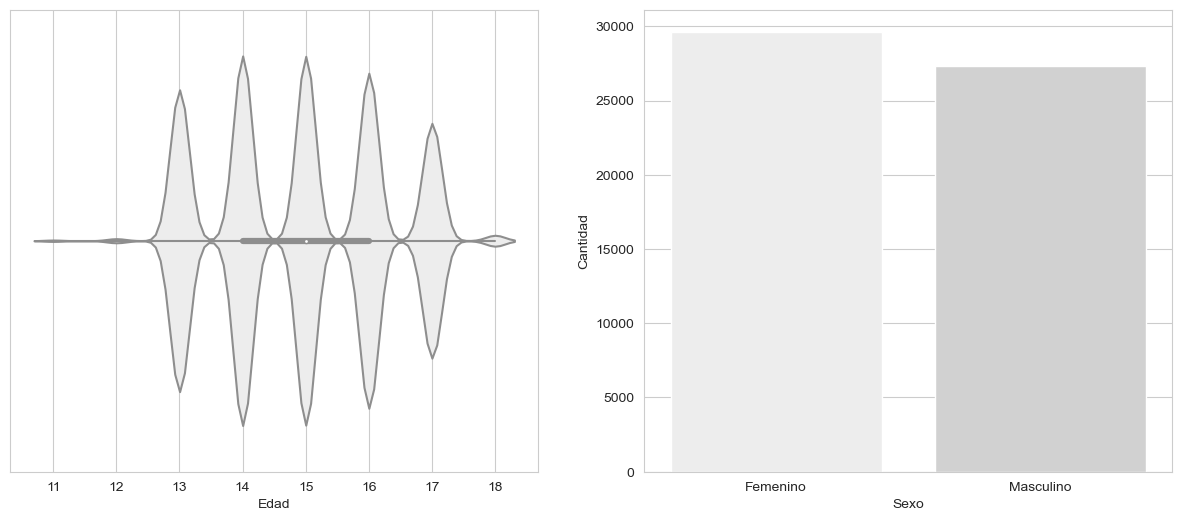

In [49]:
#age and sex
fig, ax = plt.subplots(1,2, figsize=(15,6),gridspec_kw={'wspace': 0.2})
sns.violinplot(data['age'], ax=ax[0])
sns.countplot(data['sex'], ax=ax[1])
ax[0].set_xlabel('Edad')
ax[1].set_xlabel('Sexo')
ax[1].set_ylabel('Cantidad')
plt.show()

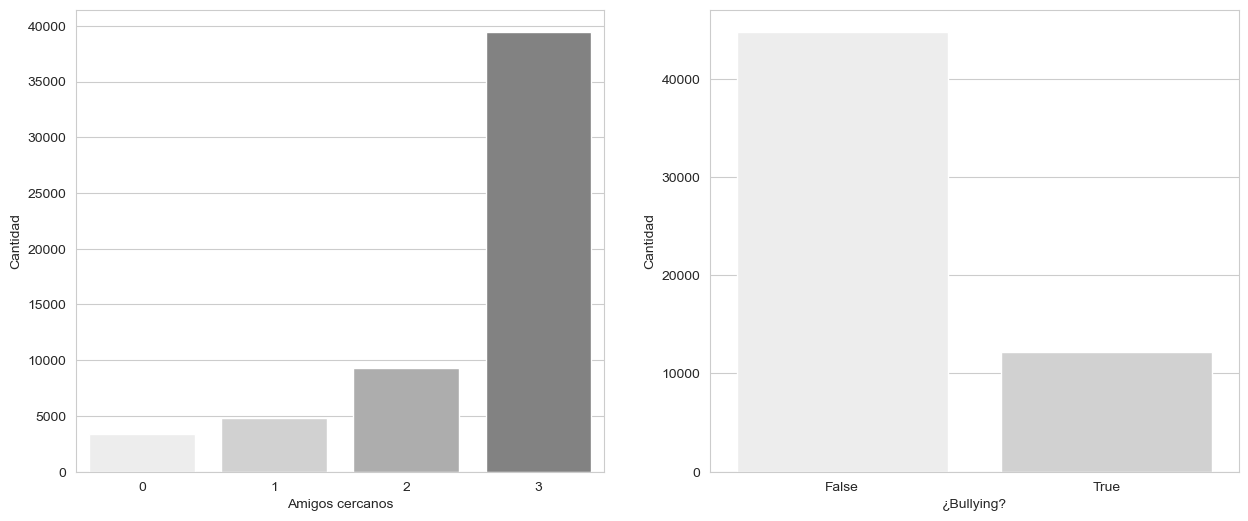

In [50]:
#bullying and close_friends
fig, ax = plt.subplots(1,2, figsize=(15,6),gridspec_kw={'wspace': 0.2})
sns.countplot(data['close_friends'], ax=ax[0])
sns.countplot(data['bullying'], ax=ax[1])
ax[0].set_ylabel('Cantidad')
ax[1].set_ylabel('Cantidad')
ax[0].set_xlabel('Amigos cercanos')
ax[1].set_xlabel('¿Bullying?')

plt.show()

In [51]:
print(f'{data["age"].value_counts(normalize=True)*100}\n')

condition = (data['age'] == 12) | (data['age'] == 18) | (data['age'] == 11)
data = data[~condition]
            
print(f'After cleaning:\n{data["age"].value_counts(normalize=True)*100}')

14    22.719854
15    22.674225
16    20.599849
13    18.557063
17    14.438146
18     0.672154
12     0.254471
11     0.084239
Name: age, dtype: float64

After cleaning:
14    22.951866
15    22.905771
16    20.810212
13    18.746565
17    14.585586
Name: age, dtype: float64


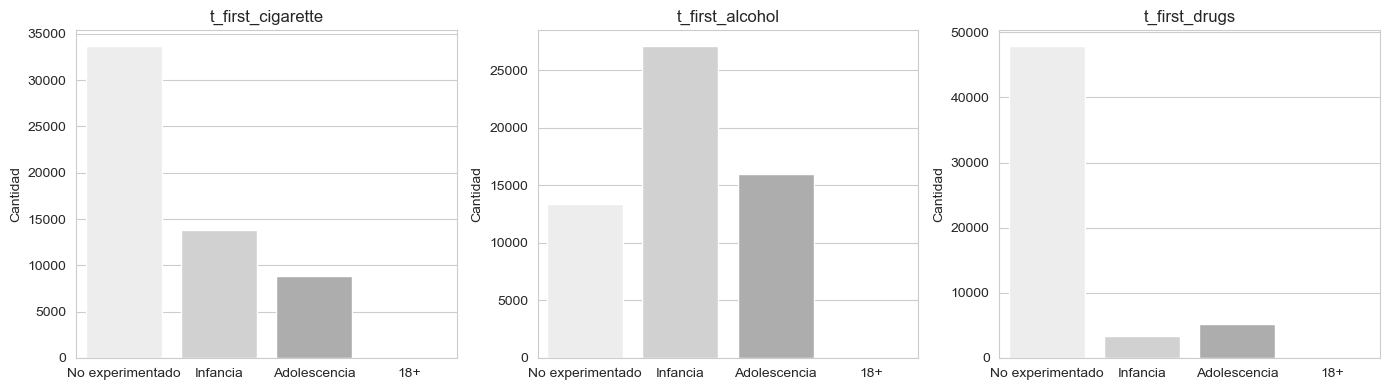

No experimentado    59.728747
Infancia            24.519103
Adolescencia        15.748604
18+                  0.003546
Name: t_first_cigarette, dtype: float64

Infancia            48.020566
Adolescencia        28.258133
No experimentado    23.719528
18+                  0.001773
Name: t_first_alcohol, dtype: float64

No experimentado    84.923322
Adolescencia         9.254499
Infancia             5.822179
18+                  0.000000
Name: t_first_drugs, dtype: float64



In [52]:
#t_first_consumption

t_first= data.filter(regex=r'^t_first')
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes = axes.flatten()

for i, columna in enumerate(t_first.columns):
    ax = axes[i]
    sns.countplot(data=t_first, x=columna, ax=ax)
    ax.set_xlabel(None) 
    ax.set_ylabel('Cantidad')  
    ax.set_title(columna)  

plt.tight_layout()

plt.show()
for i, col in enumerate(t_first.columns):
    print(f'{t_first[col].value_counts(normalize=True)*100}\n')

In [53]:
data = data.replace('18+',np.nan)
data = data.dropna(subset=list(t_first.columns))

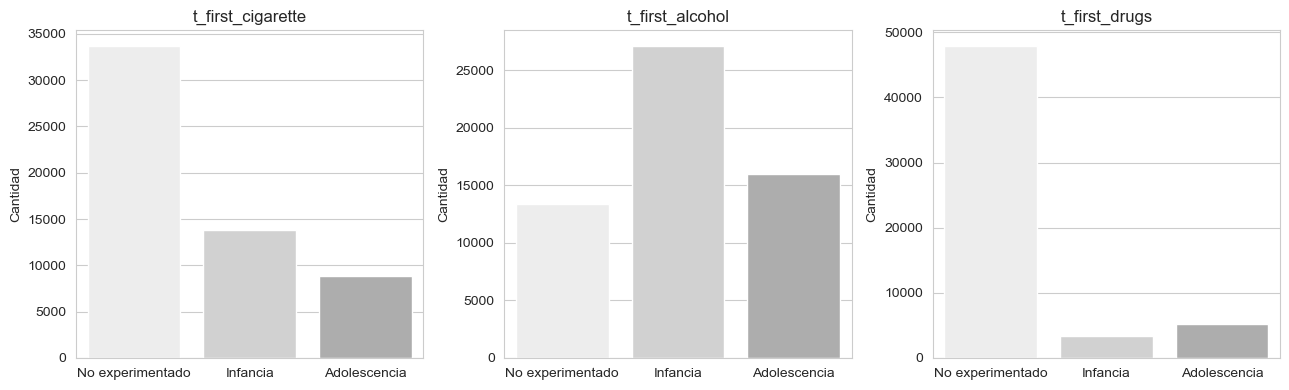


No experimentado    59.730865
Infancia            24.519972
Adolescencia        15.749162
Name: t_first_cigarette, dtype: float64


Infancia            48.020495
Adolescencia        28.259135
No experimentado    23.720369
Name: t_first_alcohol, dtype: float64


No experimentado    84.922788
Adolescencia         9.254827
Infancia             5.822385
Name: t_first_drugs, dtype: float64



In [54]:
#t_first_consumption modified
t_first= data.filter(regex=r'^t_first')
fig, axes = plt.subplots(1,3, figsize=(13, 4))
axes = axes.flatten()

for i, columna in enumerate(t_first.columns):
    ax = axes[i]
    sns.countplot(data=t_first, x=columna, ax=ax)
    ax.set_xlabel(None) 
    ax.set_ylabel('Cantidad')  
    ax.set_title(columna)  

plt.tight_layout()

plt.show()
for i, col in enumerate(t_first.columns):
    print(f'\n{t_first[col].value_counts(normalize=True)*100}\n')

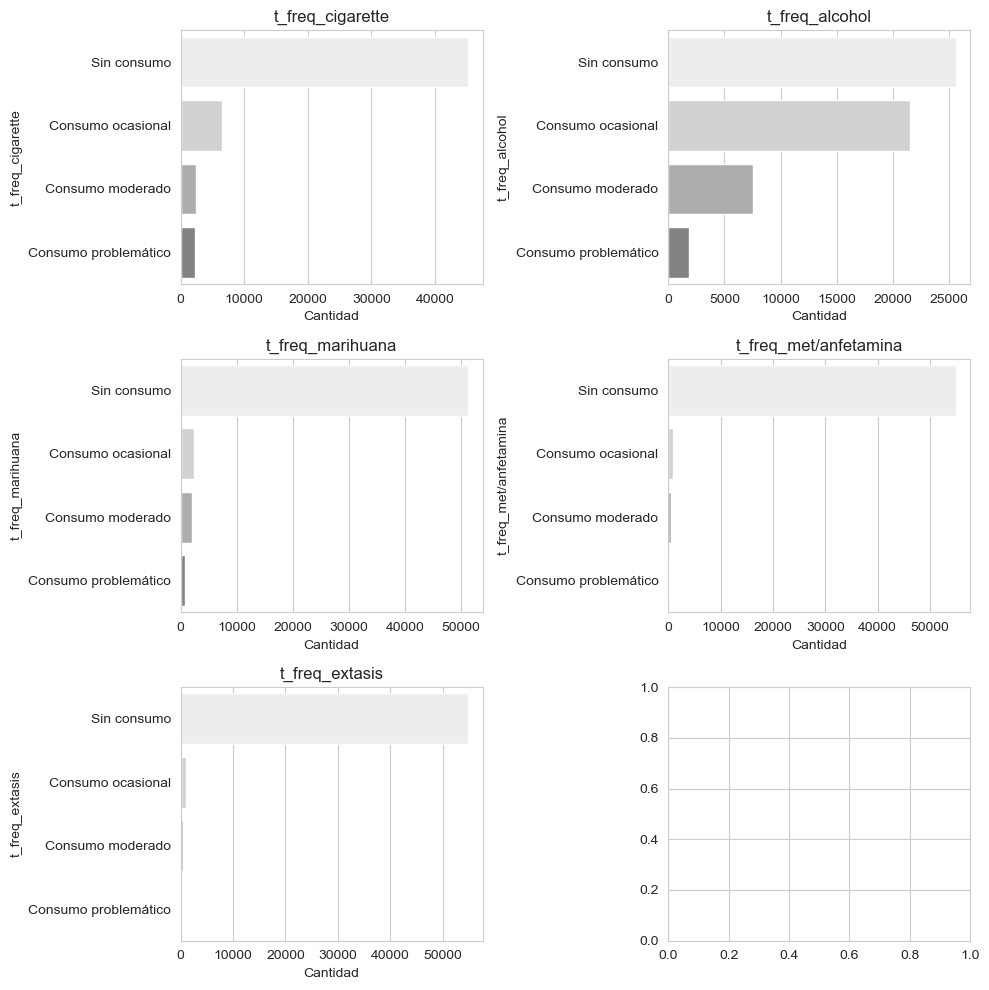


Sin consumo             80.197862
Consumo ocasional       11.460383
Consumo moderado         4.400475
Consumo problemático     3.941280
Name: t_freq_cigarette, dtype: float64


Sin consumo             45.375246
Consumo ocasional       38.099037
Consumo moderado        13.307803
Consumo problemático     3.217914
Name: t_freq_alcohol, dtype: float64


Sin consumo             90.908285
Consumo ocasional        4.184175
Consumo moderado         3.512225
Consumo problemático     1.395316
Name: t_freq_marihuana, dtype: float64


Sin consumo             97.427442
Consumo ocasional        1.480418
Consumo moderado         0.817332
Consumo problemático     0.274808
Name: t_freq_met/anfetamina, dtype: float64


Sin consumo             97.239509
Consumo ocasional        1.827917
Consumo moderado         0.707409
Consumo problemático     0.225165
Name: t_freq_extasis, dtype: float64



In [55]:
#t_freq_consumption

t_freq= data.filter(regex=r'^t_freq')
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i, columna in enumerate(t_freq.columns):
    ax = axes[i]
    sns.countplot(data=t_freq, y=columna, ax=ax)
    ax.set_xlabel(None) 
    ax.set_xlabel('Cantidad')  
    ax.set_title(columna)  

plt.tight_layout()

plt.show()
for i, col in enumerate(t_freq.columns):
    print(f'\n{t_freq[col].value_counts(normalize=True)*100}\n')

In [56]:
# Uso de la función con los datos y columnas específicas
columns = ['t_first_cigarette', 't_first_alcohol', 't_first_drugs']
columns_name = ['Cigarrillo','Alcohol','Drogas']
target_column = 'intento_suicida'

def calculate_merged_table(data, columns, target_column):
    """Función para unir cross tables"""
    merged = None
    
    for column in columns:
        df = pd.crosstab(data[column], columns=data[target_column], normalize='index')
        
        if merged is None:
            merged = df
        else:
            merged = merged.merge(df, right_index=True, left_index=True)
    
    merged = merged.filter(regex=r'^True')
    merged.columns = columns_name
    
    return merged


def plot_heatmap(data, title, xlabel, ylabel):
    """Función para graficar mapas de calor"""
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, cbar=False, cmap=paleta, fmt='.1%',linewidths=1, annot_kws={'fontsize': 15})
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.show()

### First consumption analysis

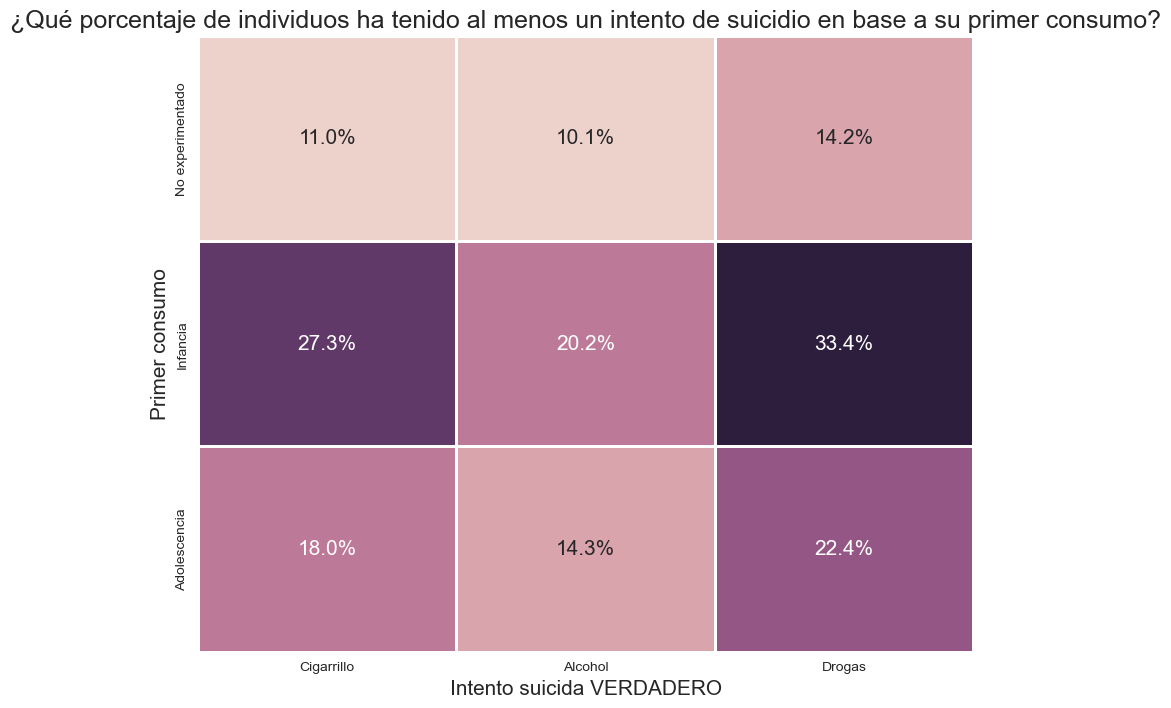

In [57]:
paleta = sns.cubehelix_palette()
# Creamos la tabla

merged_table = calculate_merged_table(data, columns, target_column)

# Graficamos

title = '¿Qué porcentaje de individuos ha tenido al menos un intento de suicidio en base a su primer consumo?'

plot_heatmap(merged_table, title, 'Intento suicida VERDADERO', 'Primer consumo')

In [58]:
print(f'{title}\n\n{merged_table}')

¿Qué porcentaje de individuos ha tenido al menos un intento de suicidio en base a su primer consumo?

                   Cigarrillo   Alcohol    Drogas
t_first_cigarette                                
No experimentado     0.109884  0.100605  0.142341
Infancia             0.273391  0.201625  0.333739
Adolescencia         0.180344  0.142920  0.224330


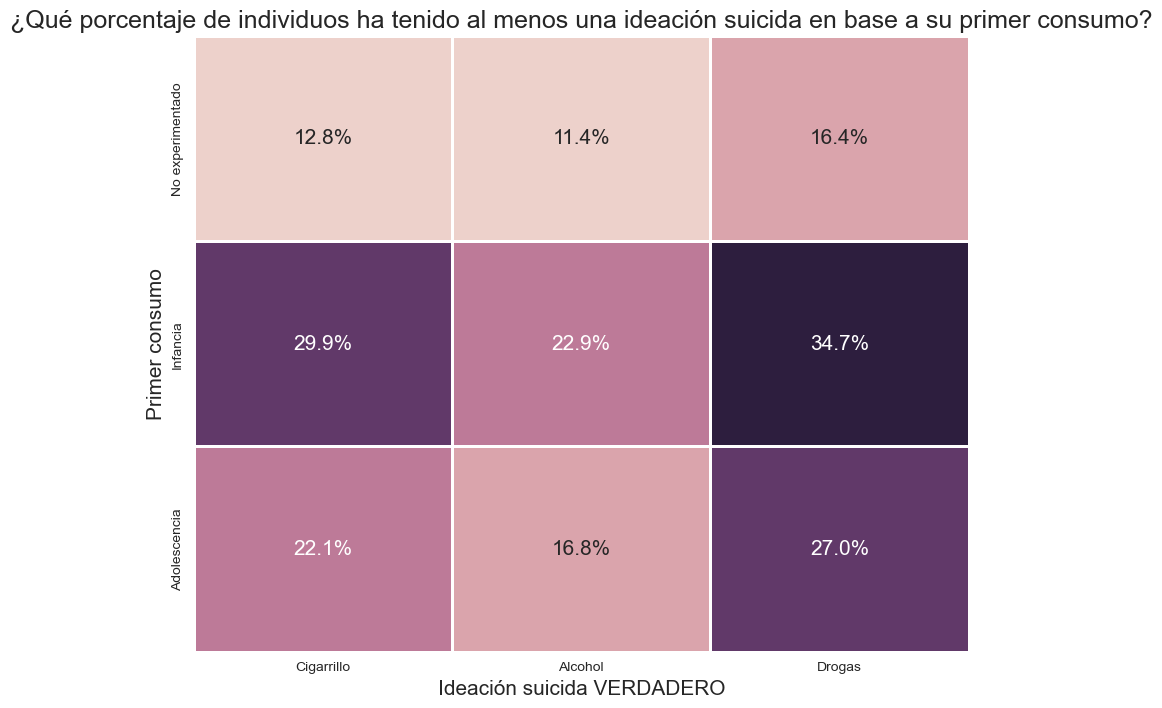

In [59]:
# Creamos la tabla

merged_table = calculate_merged_table(data, columns, 'ideacion_suicida')

# Graficamos

title = '¿Qué porcentaje de individuos ha tenido al menos una ideación suicida en base a su primer consumo?'

plot_heatmap(merged_table, title, 'Ideación suicida VERDADERO', 'Primer consumo')

In [60]:
print(f'{title}\n\n{merged_table}')

¿Qué porcentaje de individuos ha tenido al menos una ideación suicida en base a su primer consumo?

                   Cigarrillo   Alcohol    Drogas
t_first_cigarette                                
No experimentado     0.127723  0.114209  0.163803
Infancia             0.298626  0.228909  0.347138
Adolescencia         0.221209  0.167514  0.270498


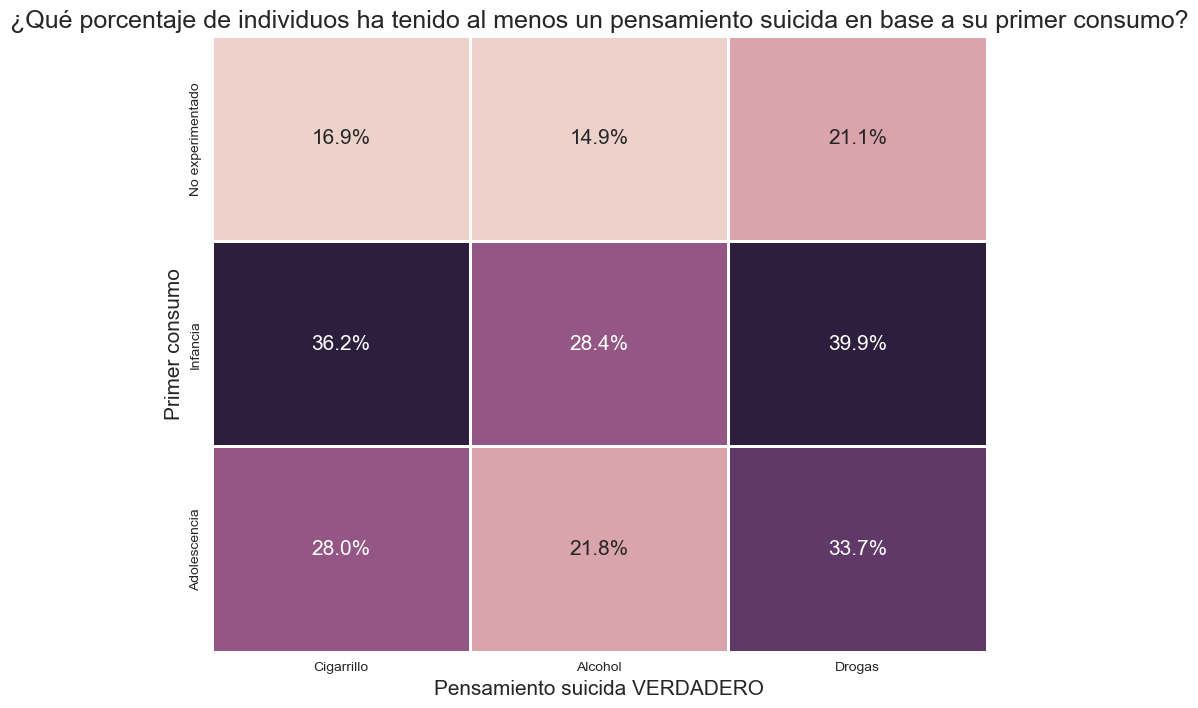

In [61]:
# Creamos la tabla

merged_table = calculate_merged_table(data, columns, 'pensamiento_suicida')

# Graficamos

title = '¿Qué porcentaje de individuos ha tenido al menos un pensamiento suicida en base a su primer consumo?'

plot_heatmap(merged_table, title, 'Pensamiento suicida VERDADERO', 'Primer consumo')

In [62]:
print(f'{title}\n\n{merged_table}')

¿Qué porcentaje de individuos ha tenido al menos un pensamiento suicida en base a su primer consumo?

                   Cigarrillo   Alcohol    Drogas
t_first_cigarette                                
No experimentado     0.168774  0.149488  0.211006
Infancia             0.361750  0.284438  0.399208
Adolescencia         0.280198  0.217956  0.337165


* Existe una tendencia general de mayores porcentajes de intento de suicidio ('True') a medida que la edad de experimentación con cigarrillos, alcohol y drogas se reduce. Esto sugiere que las personas que experimentaron con estas sustancias a una edad más temprana pueden estar en mayor riesgo de intento de suicidio en comparación con aquellos que comenzaron más tarde o nunca experimentaron.

* Entre las tres drogas mencionadas, el porcentaje más alto de intento de suicidio ('True') se encuentra en la categoría de drogas, seguido por cigarrillos y luego alcohol. Esto indica que la experimentación temprana con drogas puede tener una asociación más fuerte con el riesgo de intento de suicidio en comparación con el consumo temprano de cigarrillos o alcohol.

* Las personas que nunca han experimentado con cigarrillos, alcohol o drogas presentan los porcentajes más bajos de intento de suicidio ('True') en cada categoría. Esto sugiere que abstenerse de la experimentación con estas sustancias puede estar asociado con un menor riesgo de intento de suicidio.

### First consumption by sex

In [63]:
male_data = data[data['sex']=='Masculino']
fem_data = data[data['sex']=='Femenino']

In [64]:
merged_table = calculate_merged_table(male_data, columns, 'intento_suicida')
male_data_merged = merged_table.copy()
merged_table = calculate_merged_table(fem_data, columns, 'intento_suicida')
fem_data_merged = merged_table.copy()


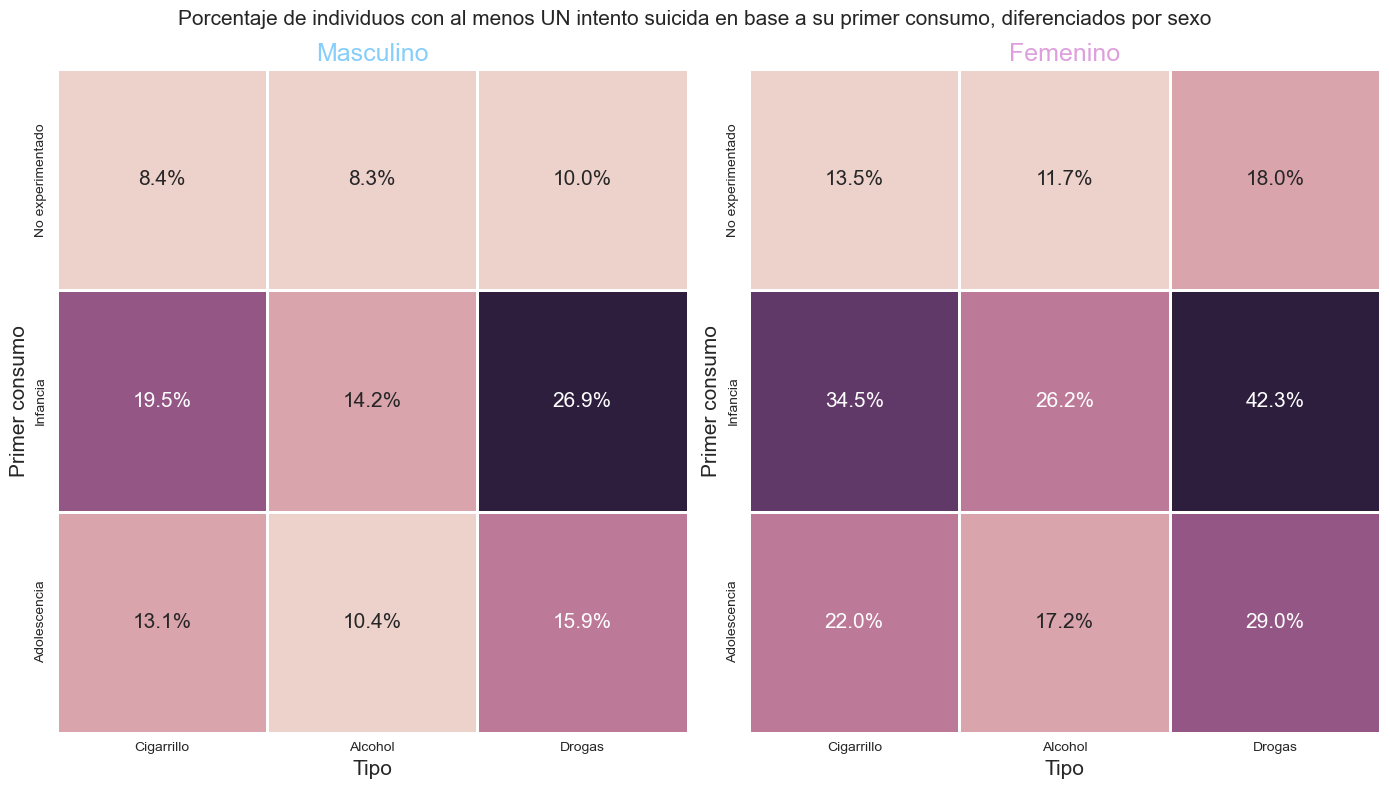

In [65]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
plt.suptitle('Porcentaje de individuos con al menos UN intento suicida en base a su primer consumo, diferenciados por sexo',fontsize=15)

sns.heatmap(male_data_merged, annot=True, cbar=False, cmap=paleta, fmt='.1%',linewidths=1, annot_kws={'fontsize': 15}, ax=ax[0])
sns.heatmap(fem_data_merged, annot=True, cbar=False, cmap=paleta, fmt='.1%',linewidths=1, annot_kws={'fontsize': 15}, ax=ax[1])

ax[0].set_title('Masculino', fontsize=18, color='lightskyblue')
ax[1].set_title('Femenino', fontsize=18, color='plum')

ax[0].set_ylabel('Primer consumo', fontsize=15)
ax[1].set_ylabel('Primer consumo', fontsize=15)

ax[0].set_xlabel('Tipo', fontsize=15)
ax[1].set_xlabel('Tipo', fontsize=15)

plt.tight_layout()
plt.show()

In [66]:
print(f'Porcentaje de individuos con al menos UN intento suicida en base a su primer consumo, diferenciados por sexo:\n\n Datos sexo Masculino:\n{male_data_merged}\n\nDatos sexo Femenino:\n{fem_data_merged}')

Porcentaje de individuos con al menos UN intento suicida en base a su primer consumo, diferenciados por sexo:

 Datos sexo Masculino:
                   Cigarrillo   Alcohol    Drogas
t_first_cigarette                                
No experimentado     0.084146  0.083321  0.100182
Infancia             0.194807  0.141784  0.269351
Adolescencia         0.130655  0.103896  0.159376

Datos sexo Femenino:
                   Cigarrillo   Alcohol    Drogas
t_first_cigarette                                
No experimentado     0.134610  0.117499  0.179716
Infancia             0.344837  0.261832  0.423469
Adolescencia         0.220260  0.172353  0.290235


* En la categoría "No experimentado":

**Sexo masculino**: El porcentaje de intentos suicidas es del 8.5% para cigarrillos, 8.3% para alcohol y 10% para drogas.<br>
**Sexo femenino**: El porcentaje de intentos suicidas es del 13.4% para cigarrillos, 11.7% para alcohol y 17.9% para drogas.<br>
En esta categoría, los porcentajes de intentos suicidas son más altos en el sexo femenino en comparación con el sexo masculino para cada tipo de droga. Esto sugiere que las mujeres que no han experimentado el consumo de drogas tienen una mayor propensión a los intentos suicidas en comparación con los hombres en la misma situación.

* En la categoría "Infancia":

**Sexo masculino**: El porcentaje de intentos suicidas es del 19.7% para cigarrillos, 14.2% para alcohol y 27.4% para drogas.<br>
**Sexo femenino**: El porcentaje de intentos suicidas es del 34.3% para cigarrillos, 26.1% para alcohol y 41.8% para drogas.<br>
En esta categoría, los porcentajes de intentos suicidas son más altos en el sexo femenino en comparación con el sexo masculino para cada tipo de droga. Esto indica que las mujeres que comenzaron a consumir drogas en la infancia tienen una mayor propensión a los intentos suicidas en comparación con los hombres en la misma situación.

* En la categoría "Adolescencia":

**Sexo masculino**: El porcentaje de intentos suicidas es del 12.7% para cigarrillos, 10.5% para alcohol y 16.2% para drogas.<br>
**Sexo femenino**: El porcentaje de intentos suicidas es del 22.3% para cigarrillos, 17.2% para alcohol y 28.8% para drogas.<br>
En esta categoría, también se observan porcentajes más altos de intentos suicidas en el sexo femenino en comparación con el sexo masculino para cada tipo de droga. Esto sugiere que las mujeres que comenzaron a consumir drogas en la adolescencia tienen una mayor propensión a los intentos suicidas en comparación con los hombres en la misma situación.

In [67]:
print(f'Datos individuos de sexo Masculino:\n{male_data_merged}\n\nDatos individuos de sexo Femenino:\n{fem_data_merged}')

Datos individuos de sexo Masculino:
                   Cigarrillo   Alcohol    Drogas
t_first_cigarette                                
No experimentado     0.084146  0.083321  0.100182
Infancia             0.194807  0.141784  0.269351
Adolescencia         0.130655  0.103896  0.159376

Datos individuos de sexo Femenino:
                   Cigarrillo   Alcohol    Drogas
t_first_cigarette                                
No experimentado     0.134610  0.117499  0.179716
Infancia             0.344837  0.261832  0.423469
Adolescencia         0.220260  0.172353  0.290235


### Freq of consumption analyisis

In [68]:
columns = ['t_freq_cigarette', 't_freq_alcohol', 't_freq_marihuana', 't_freq_met/anfetamina', 't_freq_extasis']
columns_name = ['Cigarrillo','Alcohol','Marihuana','Met/anfetaminas','Extasis']
target_column = 'intento_suicida'

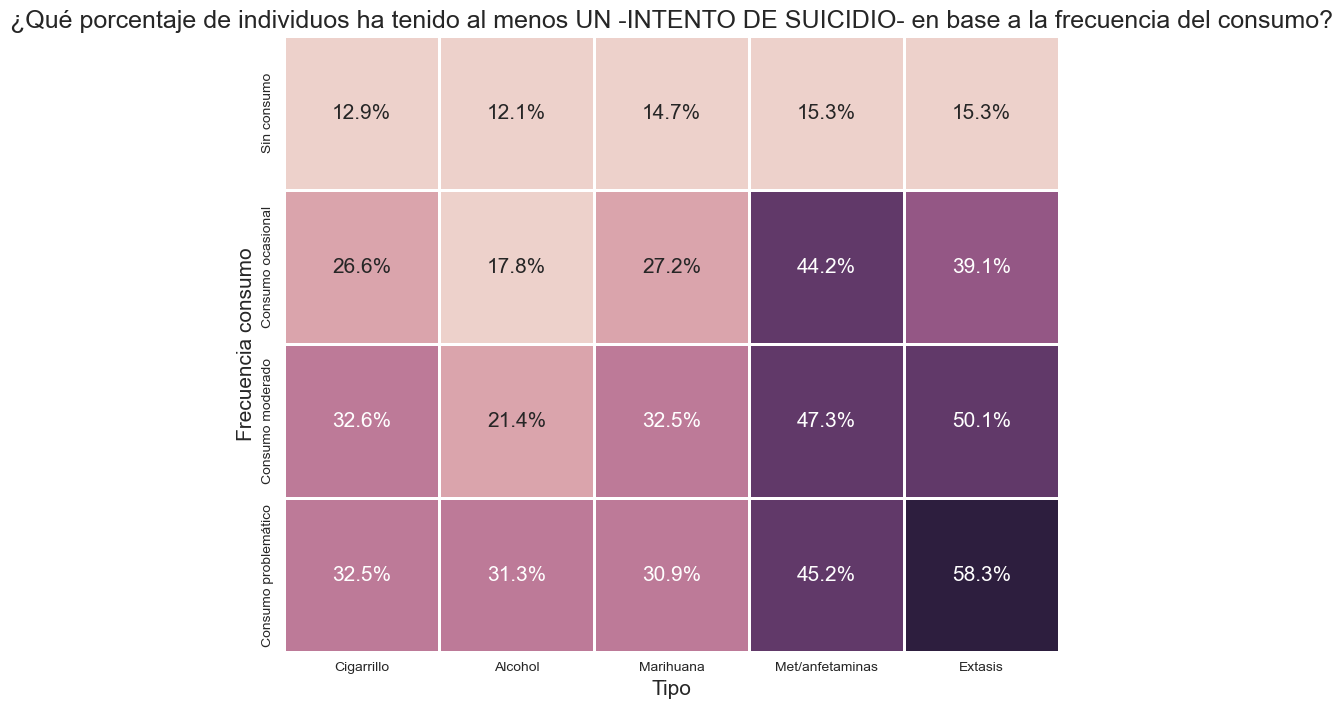

In [69]:
merged_table = calculate_merged_table(data, columns, 'intento_suicida')
title = '¿Qué porcentaje de individuos ha tenido al menos UN -INTENTO DE SUICIDIO- en base a la frecuencia del consumo?'
plot_heatmap(merged_table, title, 'Tipo', 'Frecuencia consumo')

In [70]:
print(f'{title}\n\n{merged_table}')

¿Qué porcentaje de individuos ha tenido al menos UN -INTENTO DE SUICIDIO- en base a la frecuencia del consumo?

                      Cigarrillo   Alcohol  Marihuana  Met/anfetaminas  \
t_freq_cigarette                                                         
Sin consumo             0.128930  0.120541   0.147401         0.153370   
Consumo ocasional       0.266244  0.177952   0.271610         0.441916   
Consumo moderado        0.325947  0.214229   0.324584         0.472885   
Consumo problemático    0.325236  0.312948   0.308767         0.451613   

                       Extasis  
t_freq_cigarette                
Sin consumo           0.153302  
Consumo ocasional     0.390883  
Consumo moderado      0.501253  
Consumo problemático  0.582677  


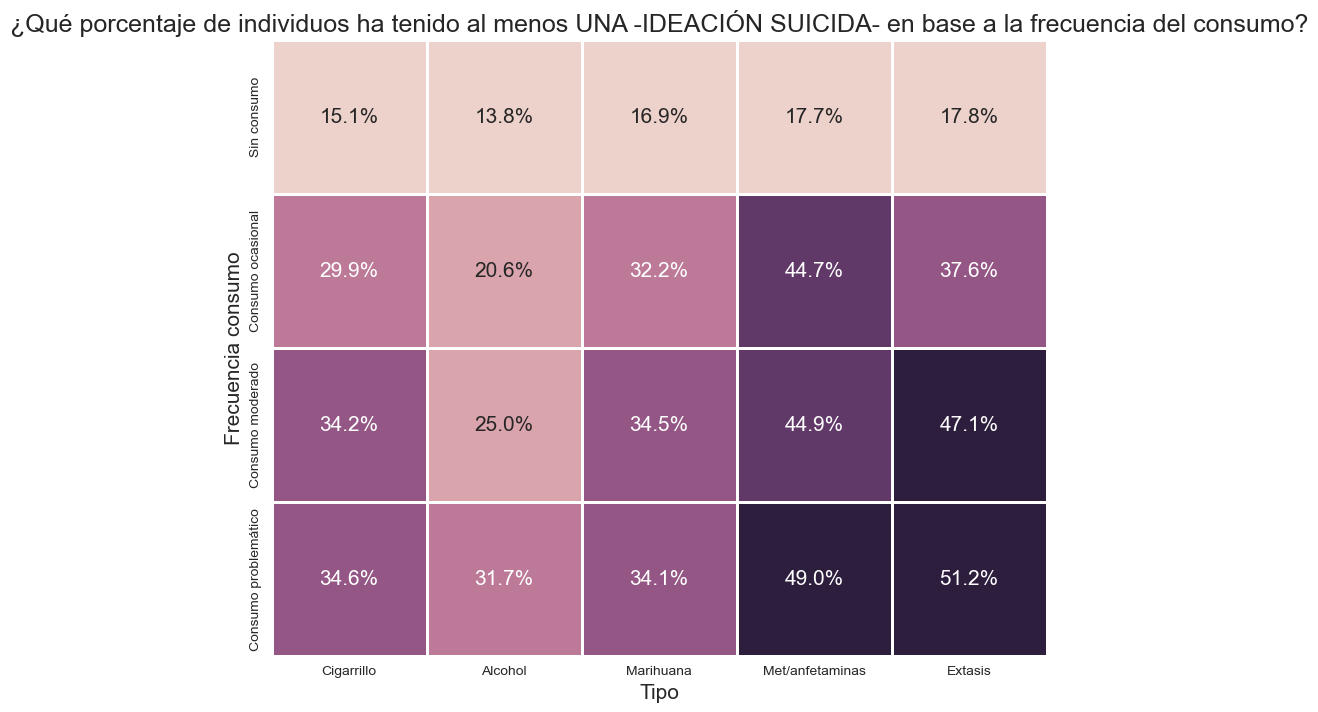

In [71]:
merged_table = calculate_merged_table(data, columns, 'ideacion_suicida')
title = '¿Qué porcentaje de individuos ha tenido al menos UNA -IDEACIÓN SUICIDA- en base a la frecuencia del consumo?'
plot_heatmap(merged_table, title, 'Tipo', 'Frecuencia consumo')

In [72]:
print(f'{title}\n\n{merged_table}')

¿Qué porcentaje de individuos ha tenido al menos UNA -IDEACIÓN SUICIDA- en base a la frecuencia del consumo?

                      Cigarrillo   Alcohol  Marihuana  Met/anfetaminas  \
t_freq_cigarette                                                         
Sin consumo             0.151368  0.137577   0.169400         0.177282   
Consumo ocasional       0.298731  0.205873   0.322034         0.446707   
Consumo moderado        0.342466  0.250200   0.345280         0.449024   
Consumo problemático    0.346379  0.316804   0.340534         0.490323   

                       Extasis  
t_freq_cigarette                
Sin consumo           0.177898  
Consumo ocasional     0.376334  
Consumo moderado      0.471178  
Consumo problemático  0.511811  


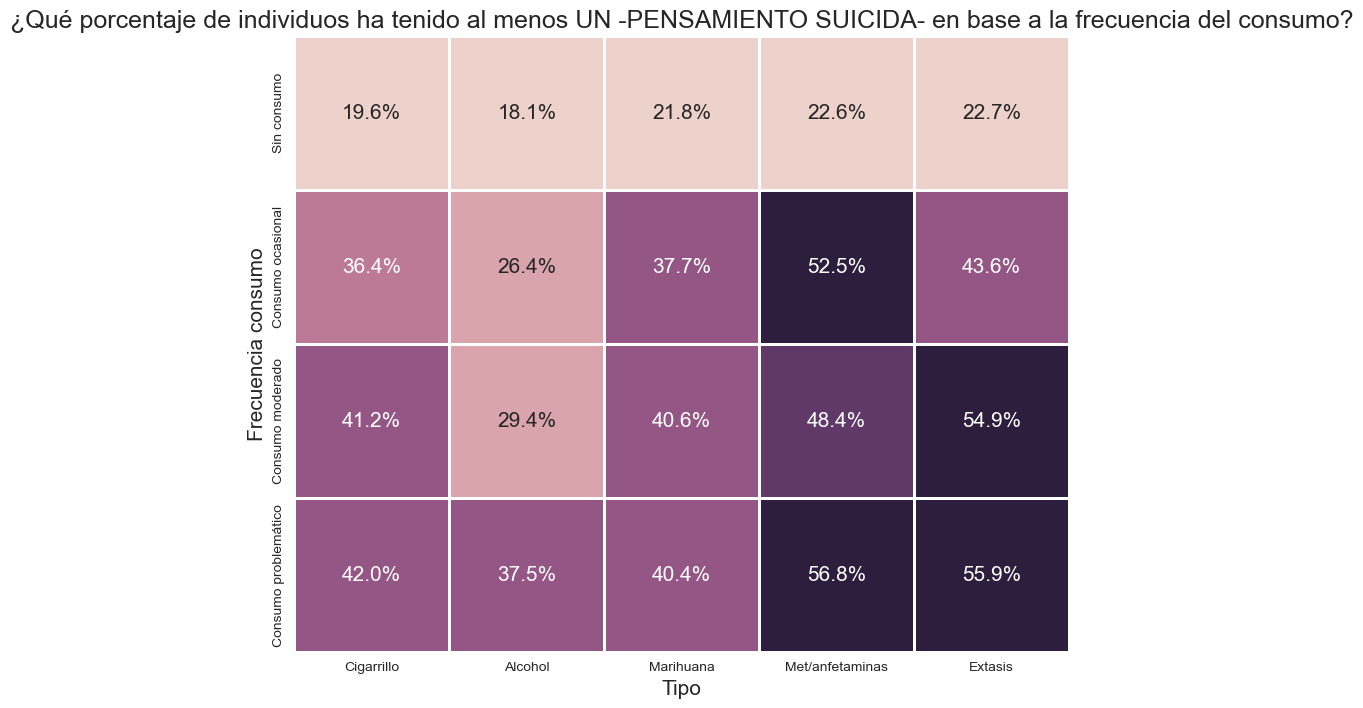

In [73]:
merged_table = calculate_merged_table(data, columns, 'pensamiento_suicida')
title = '¿Qué porcentaje de individuos ha tenido al menos UN -PENSAMIENTO SUICIDA- en base a la frecuencia del consumo?'
plot_heatmap(merged_table, title, 'Tipo', 'Frecuencia consumo')

In [74]:
print(f'{title}\n\n{merged_table}')

¿Qué porcentaje de individuos ha tenido al menos UN -PENSAMIENTO SUICIDA- en base a la frecuencia del consumo?

                      Cigarrillo   Alcohol  Marihuana  Met/anfetaminas  \
t_freq_cigarette                                                         
Sin consumo             0.196047  0.180596   0.217767         0.226179   
Consumo ocasional       0.364171  0.263856   0.376695         0.524551   
Consumo moderado        0.411765  0.293765   0.406360         0.483731   
Consumo problemático    0.420153  0.375207   0.404066         0.567742   

                       Extasis  
t_freq_cigarette                
Sin consumo           0.226780  
Consumo ocasional     0.436469  
Consumo moderado      0.548872  
Consumo problemático  0.559055  


#### In contrast...

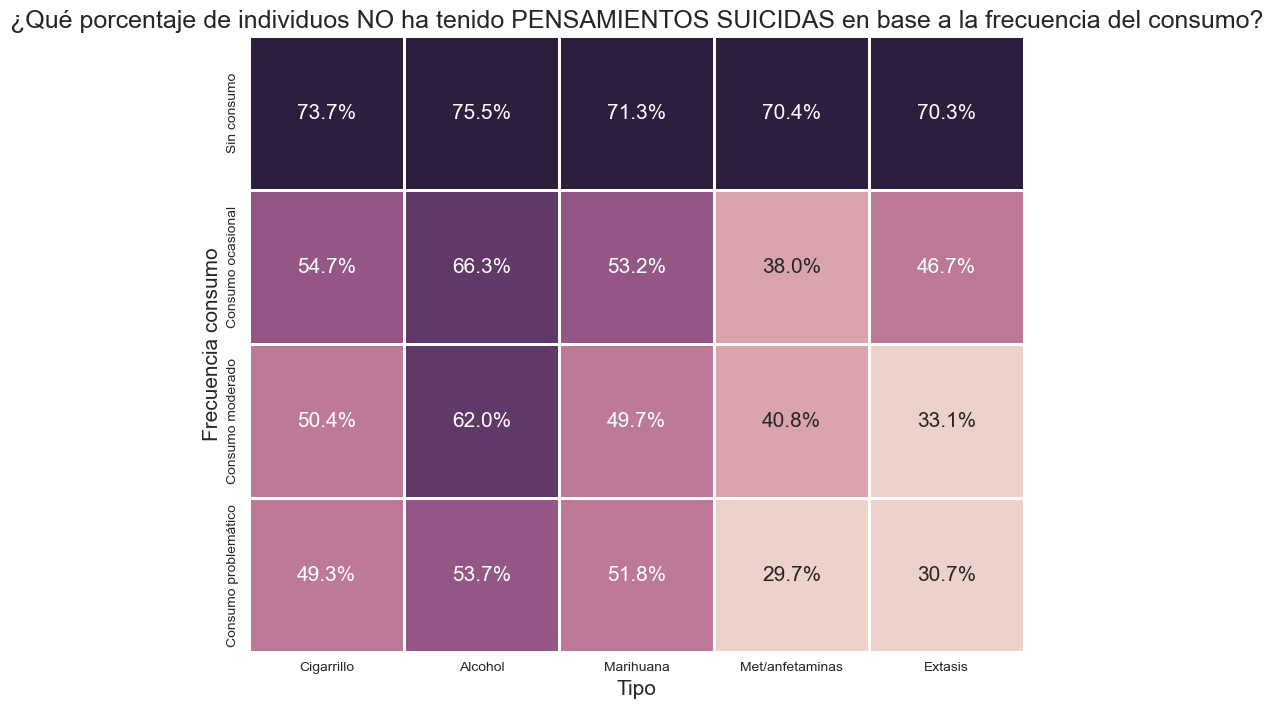

In [75]:
merged_table = calculate_merged_table(data, columns, 'sin_pensamiento_suicida')
title = '¿Qué porcentaje de individuos NO ha tenido PENSAMIENTOS SUICIDAS en base a la frecuencia del consumo?'
plot_heatmap(merged_table, title, 'Tipo', 'Frecuencia consumo')

In [76]:
print(f'{title}\n\n{merged_table}')

¿Qué porcentaje de individuos NO ha tenido PENSAMIENTOS SUICIDAS en base a la frecuencia del consumo?

                      Cigarrillo   Alcohol  Marihuana  Met/anfetaminas  \
t_freq_cigarette                                                         
Sin consumo             0.736725  0.755324   0.713057         0.703505   
Consumo ocasional       0.547494  0.663270   0.531780         0.379641   
Consumo moderado        0.503626  0.619771   0.497224         0.407809   
Consumo problemático    0.493027  0.536639   0.518424         0.296774   

                       Extasis  
t_freq_cigarette                
Sin consumo           0.703023  
Consumo ocasional     0.466537  
Consumo moderado      0.330827  
Consumo problemático  0.307087  


### Close friends analysis

In [77]:
def meanGroup(data, columna):
    return data.groupby(columna)['close_friends'].mean()

intento_sui_cf = meanGroup(data, 'intento_suicida')
ideacion_sui_cf = meanGroup(data, 'ideacion_suicida')
pensamiento_sui_cf = meanGroup(data, 'pensamiento_suicida')
sin_pens_sui_cf = meanGroup(data, 'sin_pensamiento_suicida')

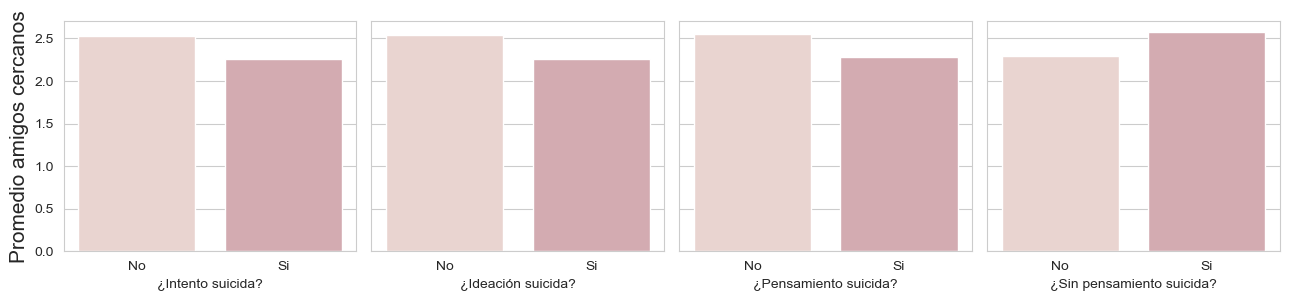

In [78]:
sns.set_palette(paleta)

fig, ax = plt.subplots(1, 4, figsize=(13, 3), sharey=True)

sns.barplot(x=intento_sui_cf.index, y=intento_sui_cf, ax=ax[0])
ax[0].set_xlabel('¿Intento suicida?')
ax[0].set_ylabel('Promedio amigos cercanos', fontsize=15)
ax[0].set_xticklabels(['No','Si'])

sns.barplot(x=ideacion_sui_cf.index, y=ideacion_sui_cf, ax=ax[1])
ax[1].set_xlabel('¿Ideación suicida?')
ax[1].set_ylabel('')
ax[1].set_xticklabels(['No','Si'])

sns.barplot(x=pensamiento_sui_cf.index, y=pensamiento_sui_cf, ax=ax[2])
ax[2].set_xlabel('¿Pensamiento suicida?')
ax[2].set_ylabel('')
ax[2].set_xticklabels(['No','Si'])

sns.barplot(x=sin_pens_sui_cf.index, y=sin_pens_sui_cf, ax=ax[3])
ax[3].set_xlabel('¿Sin pensamiento suicida?')
ax[3].set_ylabel('')
ax[3].set_xticklabels(['No','Si'])

plt.tight_layout()

plt.show()

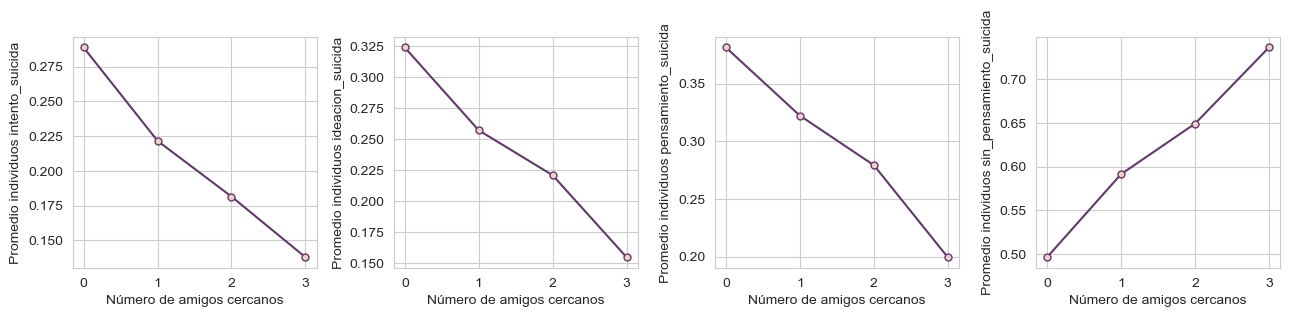

In [79]:
def plotProm(data, columna, ax):
    promedios = []
    
    for i in range(max(data['close_friends']) + 1):
        mean_value = data[data['close_friends'] == i][columna].mean()
        promedios.append(mean_value)
    
    ax.plot(range(len(promedios)), promedios, marker='o', markersize=5, markerfacecolor=paleta[0], color=paleta[4])
    ax.set_xlabel('Número de amigos cercanos')
    ax.set_ylabel(f'Promedio individuos {columna}')
    
fig, axes = plt.subplots(1, 4, figsize=(13, 3))


plotProm(data, 'intento_suicida', axes[0])
plotProm(data, 'ideacion_suicida', axes[1])
plotProm(data, 'pensamiento_suicida', axes[2])
plotProm(data, 'sin_pensamiento_suicida', axes[3])

plt.tight_layout()

plt.show()

### Bullying analysis

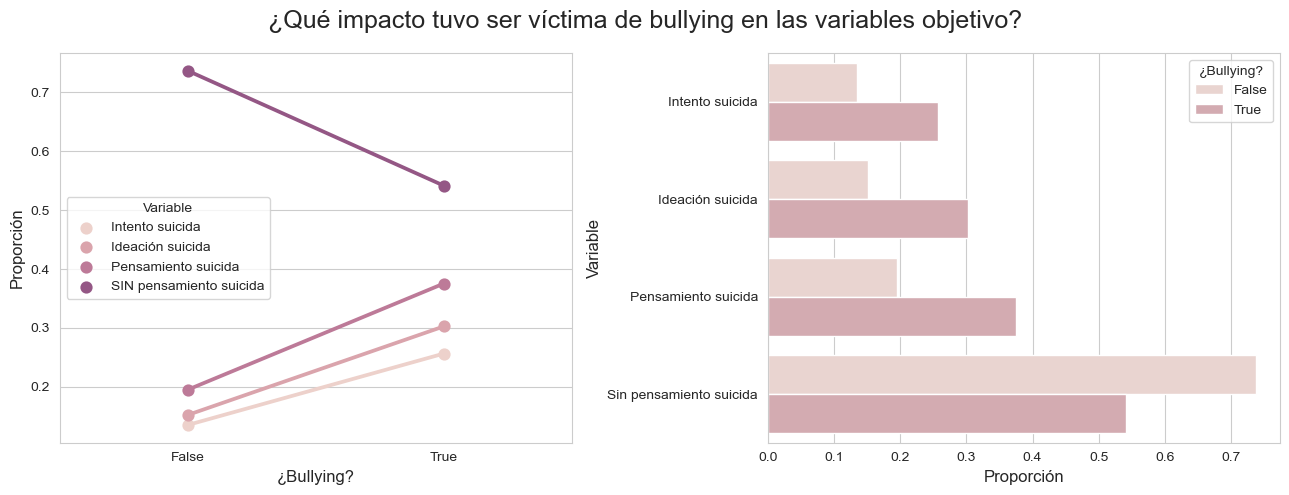

In [80]:
#Creamos el df con las proporciones según bullying y var
means_df = data.groupby('bullying')[['intento_suicida', 'ideacion_suicida', 'pensamiento_suicida', 'sin_pensamiento_suicida']].mean().reset_index()

means_df = means_df.melt(id_vars='bullying', var_name='variable', value_name='media')
means_df['variable'] = means_df['variable'].replace({
    'intento_suicida':'Intento suicida',
    'ideacion_suicida':'Ideación suicida',
    'pensamiento_suicida':'Pensamiento suicida',
    'sin_pensamiento_suicida':'SIN pensamiento suicida'
})

#Graficamos
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
plt.suptitle('¿Qué impacto tuvo ser víctima de bullying en las variables objetivo?', fontsize=18)

sns.pointplot(x='bullying', y='media', hue='variable', data=means_df, palette=paleta, ax=axs[0])

axs[0].set_xlabel('¿Bullying?', fontsize=12)
axs[0].set_ylabel('Proporción', fontsize=12)

sns.barplot(data=means_df, y='variable', x='media', hue='bullying', palette=paleta, ax=axs[1])

labels = ['Intento suicida', 'Ideación suicida', 'Pensamiento suicida', 'Sin pensamiento suicida']

axs[1].set_yticks(range(len(labels)))
axs[1].set_yticklabels(labels)

axs[1].set_ylabel('Variable', fontsize=12)
axs[1].set_xlabel('Proporción', fontsize=12)

axs[0].legend(title='Variable')
axs[1].legend(title='¿Bullying?')

plt.tight_layout()
plt.show()

* La presencia de bullying parece tener un impacto en la proporción de individuos que experimentan intentos de suicidio, ideaciones suicidas y pensamientos suicidas. Las medias de estas variables son más altas en el grupo de individuos que han sido víctimas de bullying (True) en comparación con el grupo sin bullying (False).<br>
Esto sugiere una posible asociación entre el bullying y un mayor riesgo de conductas y pensamientos suicidas.<br><br>

* En cuanto a la variable **sin_pensamiento_suicida**, la media es más baja en el grupo de individuos que han sido víctimas de bullying (True) en comparación con el grupo sin bullying (False). Esto indica que en el grupo de víctimas de bullying, hay una menor proporción de individuos que no han tenido pensamientos suicidas. Esto podría implicar que el bullying está relacionado con un mayor riesgo de experimentar pensamientos suicidas.



### Modeling


In [81]:
df = data.drop(columns=['age','sin_pensamiento_suicida','pensamiento_suicida','ideacion_suicida'])

In [82]:
df['sex'] = df['sex'].replace({'Femenino':0,'Masculino':1})

In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56403 entries, 0 to 56980
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   sex                    56403 non-null  int64   
 1   close_friends          56403 non-null  int32   
 2   q_first_cigarette      56403 non-null  int32   
 3   t_first_cigarette      56403 non-null  category
 4   q_freq_cigarette       56403 non-null  int32   
 5   t_freq_cigarette       56403 non-null  category
 6   q_first_alcohol        56403 non-null  int32   
 7   t_first_alcohol        56403 non-null  category
 8   q_freq_alcohol         56403 non-null  int32   
 9   t_freq_alcohol         56403 non-null  category
 10  q_first_drugs          56403 non-null  int32   
 11  t_first_drugs          56403 non-null  category
 12  q_freq_marihuana       56403 non-null  int32   
 13  t_freq_marihuana       56403 non-null  category
 14  q_freq_met/anfetamina  56403 non-null 

In [84]:
numeric_columns = df.select_dtypes(include=['int64','int32','bool']).columns

X = df[numeric_columns].drop('intento_suicida', axis=1)
y = df['intento_suicida']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)
lr_pred = lr.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, rf_pred),'\n')

print("Gradient Boosting:")
print(classification_report(y_test, gb_pred),'\n')

print("Logistic Regression:")
print(classification_report(y_test, lr_pred),'\n')

Random Forest:
              precision    recall  f1-score   support

       False       0.85      0.97      0.91      9470
        True       0.42      0.13      0.19      1811

    accuracy                           0.83     11281
   macro avg       0.64      0.55      0.55     11281
weighted avg       0.78      0.83      0.79     11281
 

Gradient Boosting:
              precision    recall  f1-score   support

       False       0.85      0.99      0.91      9470
        True       0.56      0.08      0.15      1811

    accuracy                           0.84     11281
   macro avg       0.70      0.54      0.53     11281
weighted avg       0.80      0.84      0.79     11281
 

Logistic Regression:
              precision    recall  f1-score   support

       False       0.85      0.99      0.91      9470
        True       0.54      0.06      0.10      1811

    accuracy                           0.84     11281
   macro avg       0.70      0.52      0.51     11281
weighted avg   

In [85]:
# Definir los parámetros para Grid Search LR
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

scorer = {'F1': make_scorer(f1_score), 'Recall': make_scorer(recall_score)}

grid_search = GridSearchCV(lr, param_grid, scoring=scorer, refit='F1', cv=5)

grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

best_params = grid_search.best_params_
best_model_lr = grid_search.best_estimator_

lr_pred = best_model_lr.predict(X_test)

In [86]:
# Definir los parámetros para Grid Search GB
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 5, 7],
#     'min_samples_leaf': [1, 3, 5]
# }

param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [7],
    'min_samples_leaf': [3]
}

scorer = {'F1': make_scorer(f1_score), 'Recall': make_scorer(recall_score)}

grid_search = GridSearchCV(gb, param_grid, scoring=scorer, refit='F1', cv=5)

grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

best_params = grid_search.best_params_
best_model_gb = grid_search.best_estimator_

y_prob = best_model_gb.predict_proba(X_test)[:, 1]

threshold = 0.19 
gb_pred = (y_prob >= threshold).astype(int)


GradientBoostingClassifier(max_depth=7, min_samples_leaf=3, n_estimators=200)

In [87]:
print("Gradient Boosting:")
print(classification_report(y_test, gb_pred),'\n')

print("Logistic Regression:")
print(classification_report(y_test, lr_pred),'\n')

Gradient Boosting:
              precision    recall  f1-score   support

       False       0.89      0.77      0.82      9470
        True       0.30      0.52      0.38      1811

    accuracy                           0.73     11281
   macro avg       0.59      0.64      0.60     11281
weighted avg       0.80      0.73      0.75     11281
 

Logistic Regression:
              precision    recall  f1-score   support

       False       0.85      0.99      0.91      9470
        True       0.54      0.06      0.10      1811

    accuracy                           0.84     11281
   macro avg       0.70      0.52      0.51     11281
weighted avg       0.80      0.84      0.78     11281
 



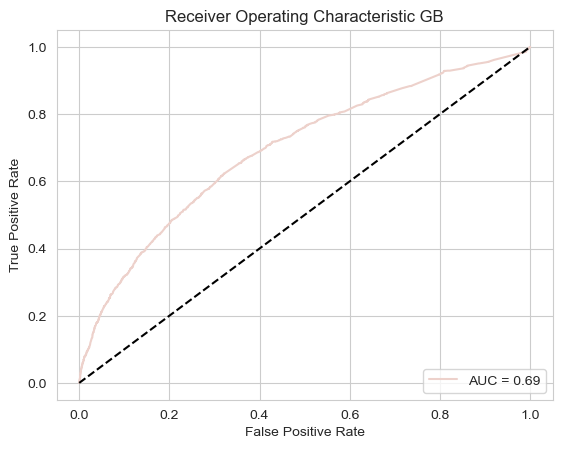

In [88]:
# Obtener las probabilidades de las predicciones
probas = best_model_gb.predict_proba(X_test)
probas_pos = probas[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probas_pos)

# Calcular el AUC-ROC para evaluar la calidad del modelo
auc_roc = roc_auc_score(y_test, probas_pos)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic GB')
plt.legend(loc='lower right')
plt.show()

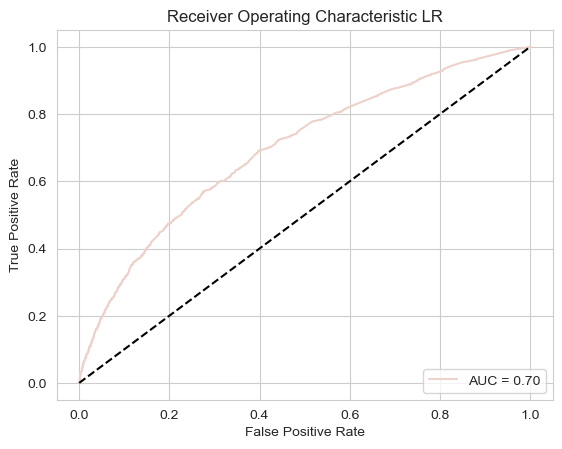

In [89]:
# Obtener las probabilidades de las predicciones
probas = best_model_lr.predict_proba(X_test)
probas_pos = probas[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probas_pos)

# Calcular el AUC-ROC para evaluar la calidad del modelo
auc_roc = roc_auc_score(y_test, probas_pos)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic LR')
plt.legend(loc='lower right')
plt.show()

In [90]:
# Obtener la importancia de las características de todos los modelos
importance_lr = best_model_lr.coef_[0]
importance_gb = best_model_gb.feature_importances_


feature_names = X.columns

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Logistic Regression': importance_lr,
    'Gradient Boosting':importance_gb
})


print("Importancia de las variables en Logistic Regression:")
print(feature_importance[['Feature', 'Logistic Regression']].\
      sort_values('Logistic Regression', ascending=False),'\n\n')
print("Importancia de las variables en Gradient Boosting:")
print(feature_importance[['Feature', 'Gradient Boosting']].\
      sort_values('Gradient Boosting', ascending=False),'\n\n')


Importancia de las variables en Logistic Regression:
                  Feature  Logistic Regression
10               bullying             0.297273
3        q_freq_cigarette             0.197975
5          q_freq_alcohol             0.147925
2       q_first_cigarette             0.147770
9          q_freq_extasis             0.121235
8   q_freq_met/anfetamina             0.090585
7        q_freq_marihuana             0.017779
6           q_first_drugs            -0.006265
4         q_first_alcohol            -0.031136
1           close_friends            -0.252774
0                     sex            -0.300714 


Importancia de las variables en Gradient Boosting:
                  Feature  Gradient Boosting
3        q_freq_cigarette           0.206963
1           close_friends           0.113890
10               bullying           0.105813
2       q_first_cigarette           0.100726
5          q_freq_alcohol           0.085119
0                     sex           0.083796
9          q_f

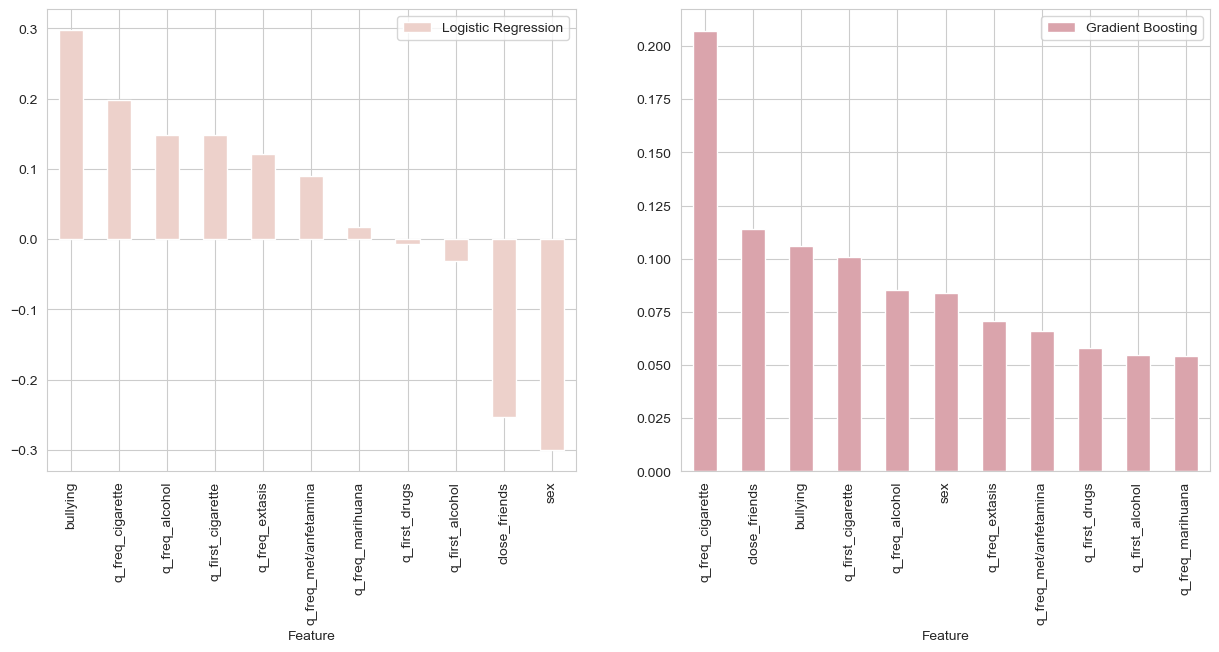

In [91]:
fig, ax=plt.subplots(1,2, figsize=(15,6))
feature_importance[['Feature', 'Logistic Regression']].\
sort_values('Logistic Regression', ascending=False).plot(kind='bar', x='Feature', ax=ax[0])
feature_importance[['Feature', 'Gradient Boosting']].\
sort_values('Gradient Boosting', ascending=False).plot(kind='bar', x='Feature', ax=ax[1], color=paleta[1])
plt.show()

*Basándonos en las tablas de importancia podemos extraer algunas conclusiones preliminares en relación con la predicción de intentos de suicidio de los alumnos:*

* **Variables relevantes:** Tanto en la regresión logística como en el Gradient Boosting, las variables "bullying" y "sex" se identifican como importantes. Esto sugiere que estas variables pueden tener una influencia significativa en la predicción de intentos de suicidio de los alumnos. El acoso escolar (bullying) y el género (sex) podrían ser factores importantes a considerar al evaluar el riesgo de intentos de suicidio en los alumnos.<br><br>

* **Otras variables relevantes:** Además de "bullying" y "sex", hay otras variables que también se consideran importantes en al menos uno de los algoritmos. Estas incluyen "q_freq_cigarette", "close_friends", "q_first_cigarette", "q_freq_alcohol" y "q_freq_met/anfetamina". Estas variables pueden proporcionar información valiosa sobre los comportamientos y experiencias de los alumnos relacionados con el consumo de cigarrillos, el consumo de alcohol, las amistades cercanas y la edad de inicio del consumo de cigarrillos.<br><br>

* **Diferencias entre los algoritmos:** Aunque hay similitudes en algunas variables importantes entre los dos algoritmos, también hay discrepancias. Por ejemplo, "q_freq_extasis" y "q_first_drugs" tienen una importancia relativa más alta en el Gradient Boosting, lo que indica que estas variables podrían tener un impacto más pronunciado en la predicción de intentos de suicidio según ese algoritmo específico.

